In [ ]:
Project Title:  "Impact of Increased Temperature and Drought in Climate Risk & Disaster Management"

Problem Statement: 
Rising global temperatures and more frequent droughts threaten human health, agriculture, water resources, and infrastructure. Traditional disaster 
management is often reactive, causing delays and inefficient resource allocation. There is a pressing need for proactive, data-driven systems that 
can predict risks, assess impacts, and optimize responses during heatwaves and droughts. By leveraging AI/ML with climate and satellite data,
such systems can provide early warnings, accurate damage assessment, and efficient disaster response planning.

Description:
This project develops an AI/ML-powered climate risk management system to predict heatwaves and droughts using NASA, NOAA, and xView2 data. 
It combines time-series forecasting, remote sensing, and ML models to monitor agricultural stress and drought severity. 
Reinforcement learning optimizes resource distribution, while risk maps highlight vulnerable regions. The system empowers governments and NGOs to act 
proactively, reduce economic losses, and strengthen resilience against climate-driven crises.

In [7]:
# Data wrangling
import numpy as np
import pandas as pd
import os


# Data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pickle
import time

# ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# Sampling
from imblearn.over_sampling import SMOTE


# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")





In [13]:
df = pd.read_csv("C:/Users/athir/Downloads/soil_data.csv")
df1 = pd.read_csv("C:/Users/athir/Downloads/temp_cleaned.csv")

In [12]:
print("---- Basic Info ----")
print(df.info())
print(df1.info())

---- Basic Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   

In [5]:
print("\n---- Summary Statistics ----")
print(df.describe(include='all'))  
print(df1.describe(include='all'))


---- Summary Statistics ----
               fips          lat          lon    elevation       slope1  \
count   3109.000000  3109.000000  3109.000000  3109.000000  3109.000000   
mean   30678.538437    38.280052   -91.659790   427.624638     0.054973   
std    14986.018730     4.838634    11.485291   500.158880     0.089873   
min     1001.000000    25.601043  -124.211407    -1.000000     0.000000   
25%    19045.000000    34.686818   -98.046842   132.000000     0.008300   
50%    29213.000000    38.328061   -90.181170   272.000000     0.028300   
75%    46009.000000    41.703590   -83.373303   483.000000     0.068500   
max    56045.000000    48.842653   -67.609354  3561.000000     0.974000   

           slope2       slope3       slope4       slope5       slope6  ...  \
count  3109.00000  3109.000000  3109.000000  3109.000000  3109.000000  ...   
mean      0.29775     0.319991     0.155878     0.053409     0.065323  ...   
std       0.21595     0.167727     0.128400     0.073107    

In [10]:
print("\n---- Missing Values ----")
print(df.isnull().sum())
#creates dataframe
print(df1.isnull().sum())
df.dropna(inplace=True)


---- Missing Values ----
fips             0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5              0
SQ6              0
SQ7              0
dtype: int64


In [3]:
import pandas as pd
df = pd.read_csv("C:/Users/athir/Downloads/soil_data.csv")
df1 = pd.read_csv("C:/Users/athir/Downloads/temp_cleaned.csv")
print(df.head()) #headers
print(df1.head())

   fips        lat        lon  elevation  slope1  slope2  slope3  slope4  \
0  1001  32.536382 -86.644490         63  0.0419  0.2788  0.2984  0.2497   
1  1005  31.870670 -85.405456        146  0.0158  0.1868  0.5441  0.2424   
2  1003  30.659218 -87.746067         52  0.0746  0.4370  0.4415  0.0469   
3  1007  33.015893 -87.127148         93  0.0144  0.1617  0.3714  0.3493   
4  1009  33.977448 -86.567246        198  0.0050  0.0872  0.2799  0.3576   

   slope5  slope6  ...  CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  \
0  0.1142  0.0170  ...    56.293411     1.014811  57.308224    1    1    1   
1  0.0106  0.0003  ...    72.578804     1.828159  74.406960    3    2    1   
2  0.0000  0.0000  ...    59.843639     2.996914  62.840553    3    2    1   
3  0.0898  0.0134  ...     1.916593     0.008330   1.924924    3    2    1   
4  0.1477  0.1037  ...     1.891909     0.027488   1.919397    3    2    1   

   SQ4  SQ5  SQ6  SQ7  
0    1    1    1    2  
1    1    1    1    1  
2 

In [6]:
df.shape
df1.shape

(14, 5)

In [22]:
df1.columns

Index(['country', 'Code', 'Year', 'Moderate heat', 'Extreme heat'], dtype='object')

In [69]:
print(df.columns.tolist())

['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3', 'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE', 'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7']


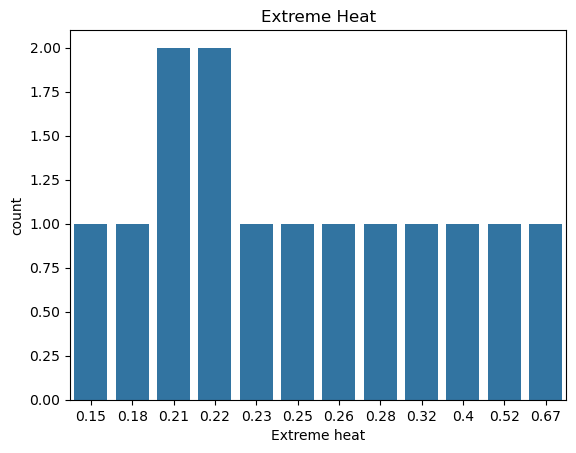

In [13]:
# Data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#Univariate Analysis
sns.countplot(x='Extreme heat',data=df1)
plt.title('Extreme Heat')
plt.show()

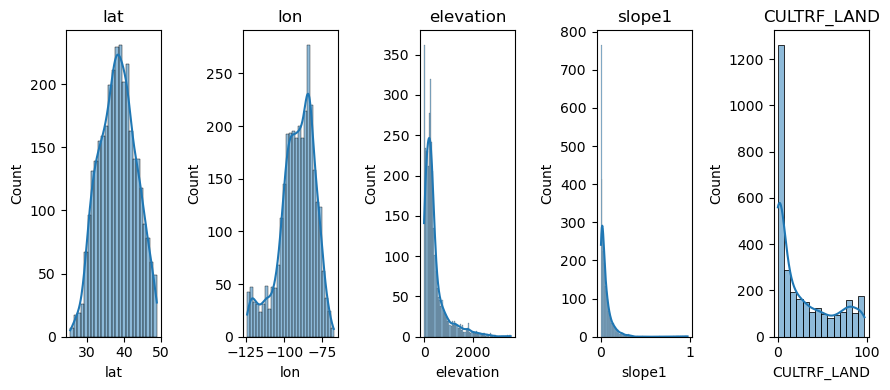

In [21]:
num_cols=['lat', 'lon', 'elevation', 'slope1', 'CULTRF_LAND']
fig,axes=plt.subplots(1,5,figsize=(9,4))
for ax,col in zip(axes,num_cols):
    sns.histplot(df[col],kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
#Bivariate analysis

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='CULTRF_LAND', y='URB_LAND', data=df, ax=axes[0]).set_title('Culture Land vs Urban Land')
sns.countplot(x='Extreme Heat', hue='Year', data=df1, ax=axes[1]).set_title('Extreme Heat vs Years')
sns.countplot(x='Moderate Heat', hue='Year', data=df1, ax=axes[2]).set_title('Moderate Heat vs Years')

plt.tight_layout()
plt.show()


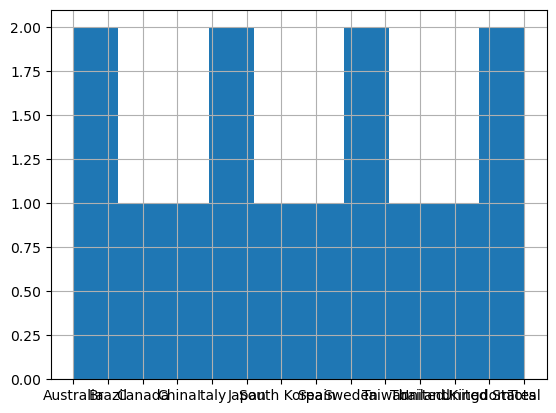

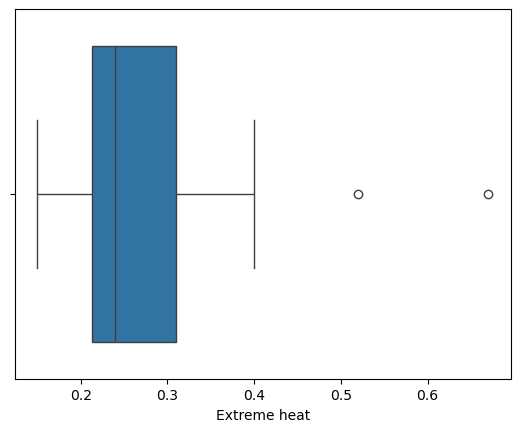

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df1['country'].hist()
plt.show()

# Boxplot
sns.boxplot(x=df1['Extreme heat'])
plt.show()


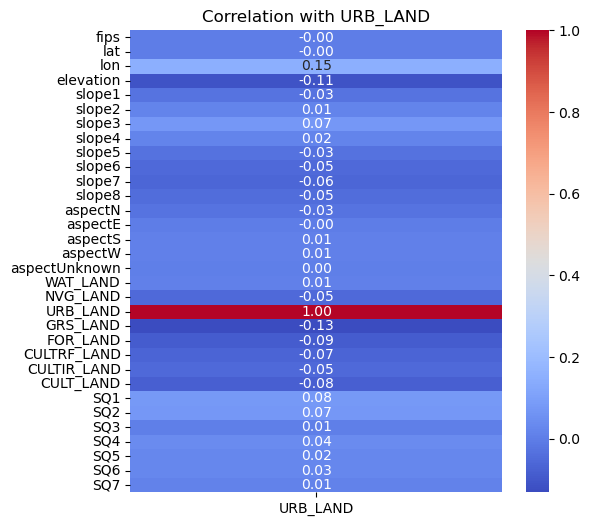

In [32]:
plt.figure(figsize=(6,6))
sns.heatmap(corr[['URB_LAND']], annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation with URB_LAND")
plt.show()


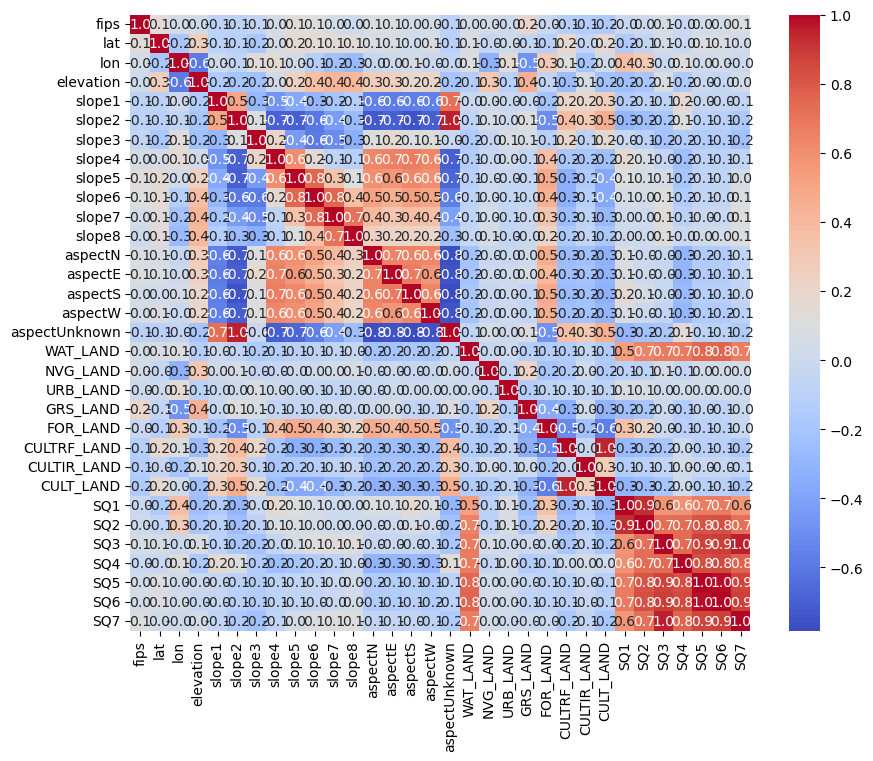

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", cbar=True)

plt.show()


In [47]:
#data transformations
df1 = pd.read_csv("C:/Users/athir/Downloads/temp_cleaned.csv")
df1.columns = df1.columns.str.strip()
df1.drop(columns=['Code'], inplace=True, errors='ignore')
print(df1.head())          # show first 5 rows
print(df1.columns.tolist())  

     country  Year  Moderate heat  Extreme heat
0  Australia  2015           0.14          0.32
1     Brazil  2015           0.48          0.22
2     Canada  2015           0.27          0.26
3      China  2015           0.24          0.40
4      Italy  2015           0.94          0.67
['country', 'Year', 'Moderate heat', 'Extreme heat']


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_cols=['country','Year','Moderate heat','Extreme heat']
for col in categorical_cols:
    df1[col]=le.fit_transform(df1[col])

In [54]:
from sklearn.model_selection import train_test_split
X=df.drop('lat',axis=1)
y=df['lon']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
X_train.shape

(2487, 31)

In [56]:
X_test.shape

(622, 31)

In [68]:
#feature selection
from sklearn.feature_selection import SelectKBest, chi2

X = df1.drop('Extreme heat', axis=1)
y = df1['Extreme heat']

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
featureScores = pd.concat([df_columns, df_scores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10, 'Score'))



         Feature      Score
2  Moderate heat  25.902439
0        country  21.923077
1           Year        NaN


C:\Users\athir\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=3. All the features will be returned.
  warnings.warn(
